<a href="https://colab.research.google.com/github/ardilalukita14/PCVK-Genap-21-22/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM 9**

## **TUGAS PRAKTIKUM**

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV.

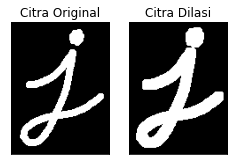

In [50]:
def dilasi_citra(F,w) :            # F mendefinisikan image-nya.       # w mendefinisikan nilai masking

# Menghitung size citra 
  a,b = F.shape
  image_dilasi = np.zeros((a,b), dtype=np.uint8)

  # Generate SED
  SED = np.ones((w, w), dtype=np.uint8)
  constant1 = (w-1)//2

  # Tahapan dalam dilasi
  for i in range(constant1, a-constant1):
    for j in range(constant1, b-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp * SED
      image_dilasi[i, j] = np.max(product)
  return image_dilasi

image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)
  
ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
w = 5
image_dilasi = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_dilasi, cmap='gray')
plt.title('Citra Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()              


Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV.

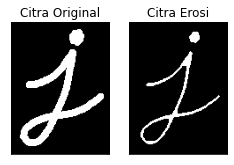

In [51]:
def erosi_citra(F, k):

# Menghitung ukuran gambar atau citra
  p,q = F.shape

  # Melakukan generate SEE
  SEE = np.ones((k,k), dtype=np.uint8)
  constant = (k-1)//2

  image_erosi = np.zeros((p,q), dtype=np.uint8)

  #Proses erosi
  for i in range(constant, p-constant):
    for j in range(constant, q-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp*SEE
      image_erosi[i, j] = np.min(product)
  return image_erosi

img_ori = cv2.imread('/content/drive/MyDrive/Images/j.png',0)
ret1, thresh1 = cv2.threshold(img_ori, 127, 225, cv2.THRESH_BINARY)
k=5
image_erosi = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_ori, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_erosi, cmap='gray')
plt.title('Citra Erosi'), plt.xticks([]), plt.yticks([])
plt.show()  

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV.

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


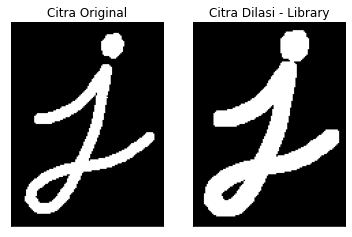

In [52]:

# Dilasi dnegan library openCV

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)


ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((5,5), np.uint16)
dilasi_image = cv2.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilasi_image, cmap='gray')
plt.title('Citra Dilasi - Library'), plt.xticks([]), plt.yticks([])
plt.show()  

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV.

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


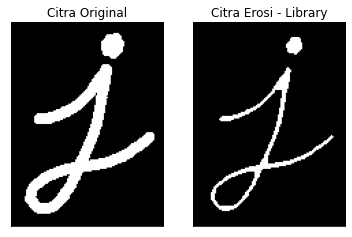

In [53]:
# Mengimplementasikan fungsi erosi dengan library

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

kernel= np.ones((5,5), np.uint8)
erosi_image = cv2.erode(image, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosi_image, cmap='gray')
plt.title('Citra Erosi - Library'), plt.xticks([]), plt.yticks([])
plt.show()  


Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 7 x 7 tanpa dan dengan menggunakan library morphology dari openCV.

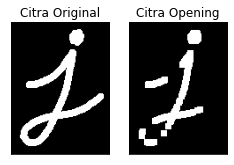

In [54]:
# Operasi Opening dengan SE

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

reto, thresho = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
k=7

image_opening = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Opening'), plt.xticks([]), plt.yticks([])
plt.show()  


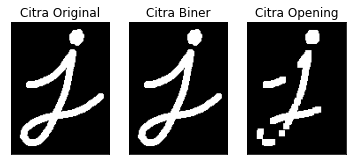

In [55]:
# Operasi Opening dengan SE dengan library

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((7,7), np.uint8)
opening_image = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(opening_image, cmap='gray')
plt.title('Citra Opening'), plt.xticks([]), plt.yticks([])
plt.show()  

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 7 x 7 tanpa dan dengan menggunakan library morphology dari openCV.

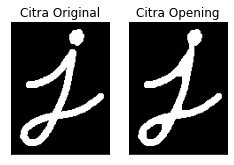

In [56]:
# Operasi Closing dengan SE

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

retc, threshc = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
k=7

image_closing = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_closing, cmap='gray')
plt.title('Citra Opening'), plt.xticks([]), plt.yticks([])
plt.show()  

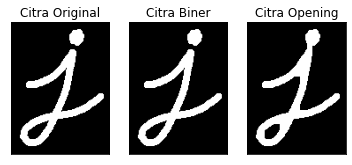

In [58]:
# Operasi Closing dengan SE library

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((7,7), np.uint8)
closing_image = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(closing_image, cmap='gray')
plt.title('Citra Opening'), plt.xticks([]), plt.yticks([])
plt.show()  

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5.


In [57]:
# 